In [7]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 16
np.random.seed(seed)

In [8]:
# POWER DISTANCE TEST, FIRST IS LOWEST VALUE, SECOND IS DEGREE OF INEQUALITY
M = [1000, 3]
E = [0.1, 3]
I = [0.1, 3]
power_distance = [M,E,I]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, power = True, power_dist = power_distance)

In [9]:
check_parameters(agents, M, E, I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1797 		 0.18 		 0.12 |
| 1740 		 0.1 		 0.13 |
| 1133 		 0.14 		 0.19 |
| 1261 		 0.15 		 0.13 |
| 1186 		 0.12 		 0.12 |
| 2437 		 0.13 		 0.14 |
| 1533 		 0.1 		 0.1 |
| 1407 		 0.1 		 0.17 |
| 1184 		 0.44 		 0.34 |
| 1012 		 0.15 		 0.1 |
| 1524 		 0.44 		 0.12 |
| 1356 		 0.17 		 0.11 |
| 1041 		 0.14 		 0.11 |
| 1434 		 0.1 		 0.13 |
| 1094 		 0.14 		 0.1 |
| 1012 		 0.14 		 0.11 |
| 1035 		 0.16 		 0.2 |
| 1032 		 0.13 		 0.11 |
| 1635 		 0.16 		 0.12 |
-------------------------------------
The s.d. of M is: 729.0
The s.d. of E is: 0.04
The s.d. of I is: 0.08
-------------------------------------
The mean of M is: 1465
The mean of E is: 0.14
The mean of I is: 0.15
-------------------------------------
The population mean parameters entered were: 1000, 0.1, 0.1
The population s.d. parameters entered were: 3, 3, 3
condition mean M unsatisfied
condition mean

(array([80., 13.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1001. , 1630.1, 2259.2, 2888.3, 3517.4, 4146.5, 4775.6, 5404.7,
        6033.8, 6662.9, 7292. ]),
 <a list of 10 Patch objects>)

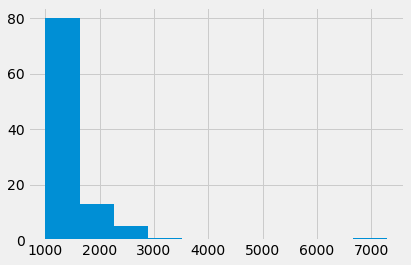

In [10]:
plt.hist([agent.m for agent in agents])

(array([76., 15.,  4.,  1.,  1.,  0.,  2.,  0.,  0.,  1.]),
 array([0.1  , 0.156, 0.212, 0.268, 0.324, 0.38 , 0.436, 0.492, 0.548,
        0.604, 0.66 ]),
 <a list of 10 Patch objects>)

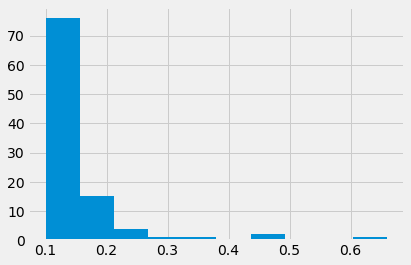

In [11]:
plt.hist([agent.e for agent in agents])

(array([54., 19., 12.,  8.,  4.,  0.,  0.,  0.,  2.,  1.]),
 array([0.1  , 0.124, 0.148, 0.172, 0.196, 0.22 , 0.244, 0.268, 0.292,
        0.316, 0.34 ]),
 <a list of 10 Patch objects>)

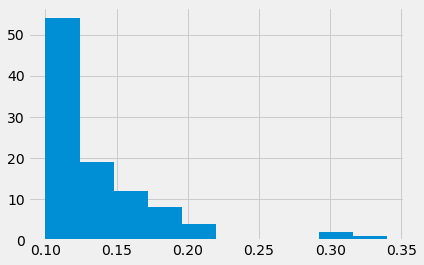

In [12]:
plt.hist([agent.i for agent in agents])

In [4]:
tournament_seed16_XmM1000_Xme01_Xmi01_AM3_Ae3_Ai3 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 205 minutes.


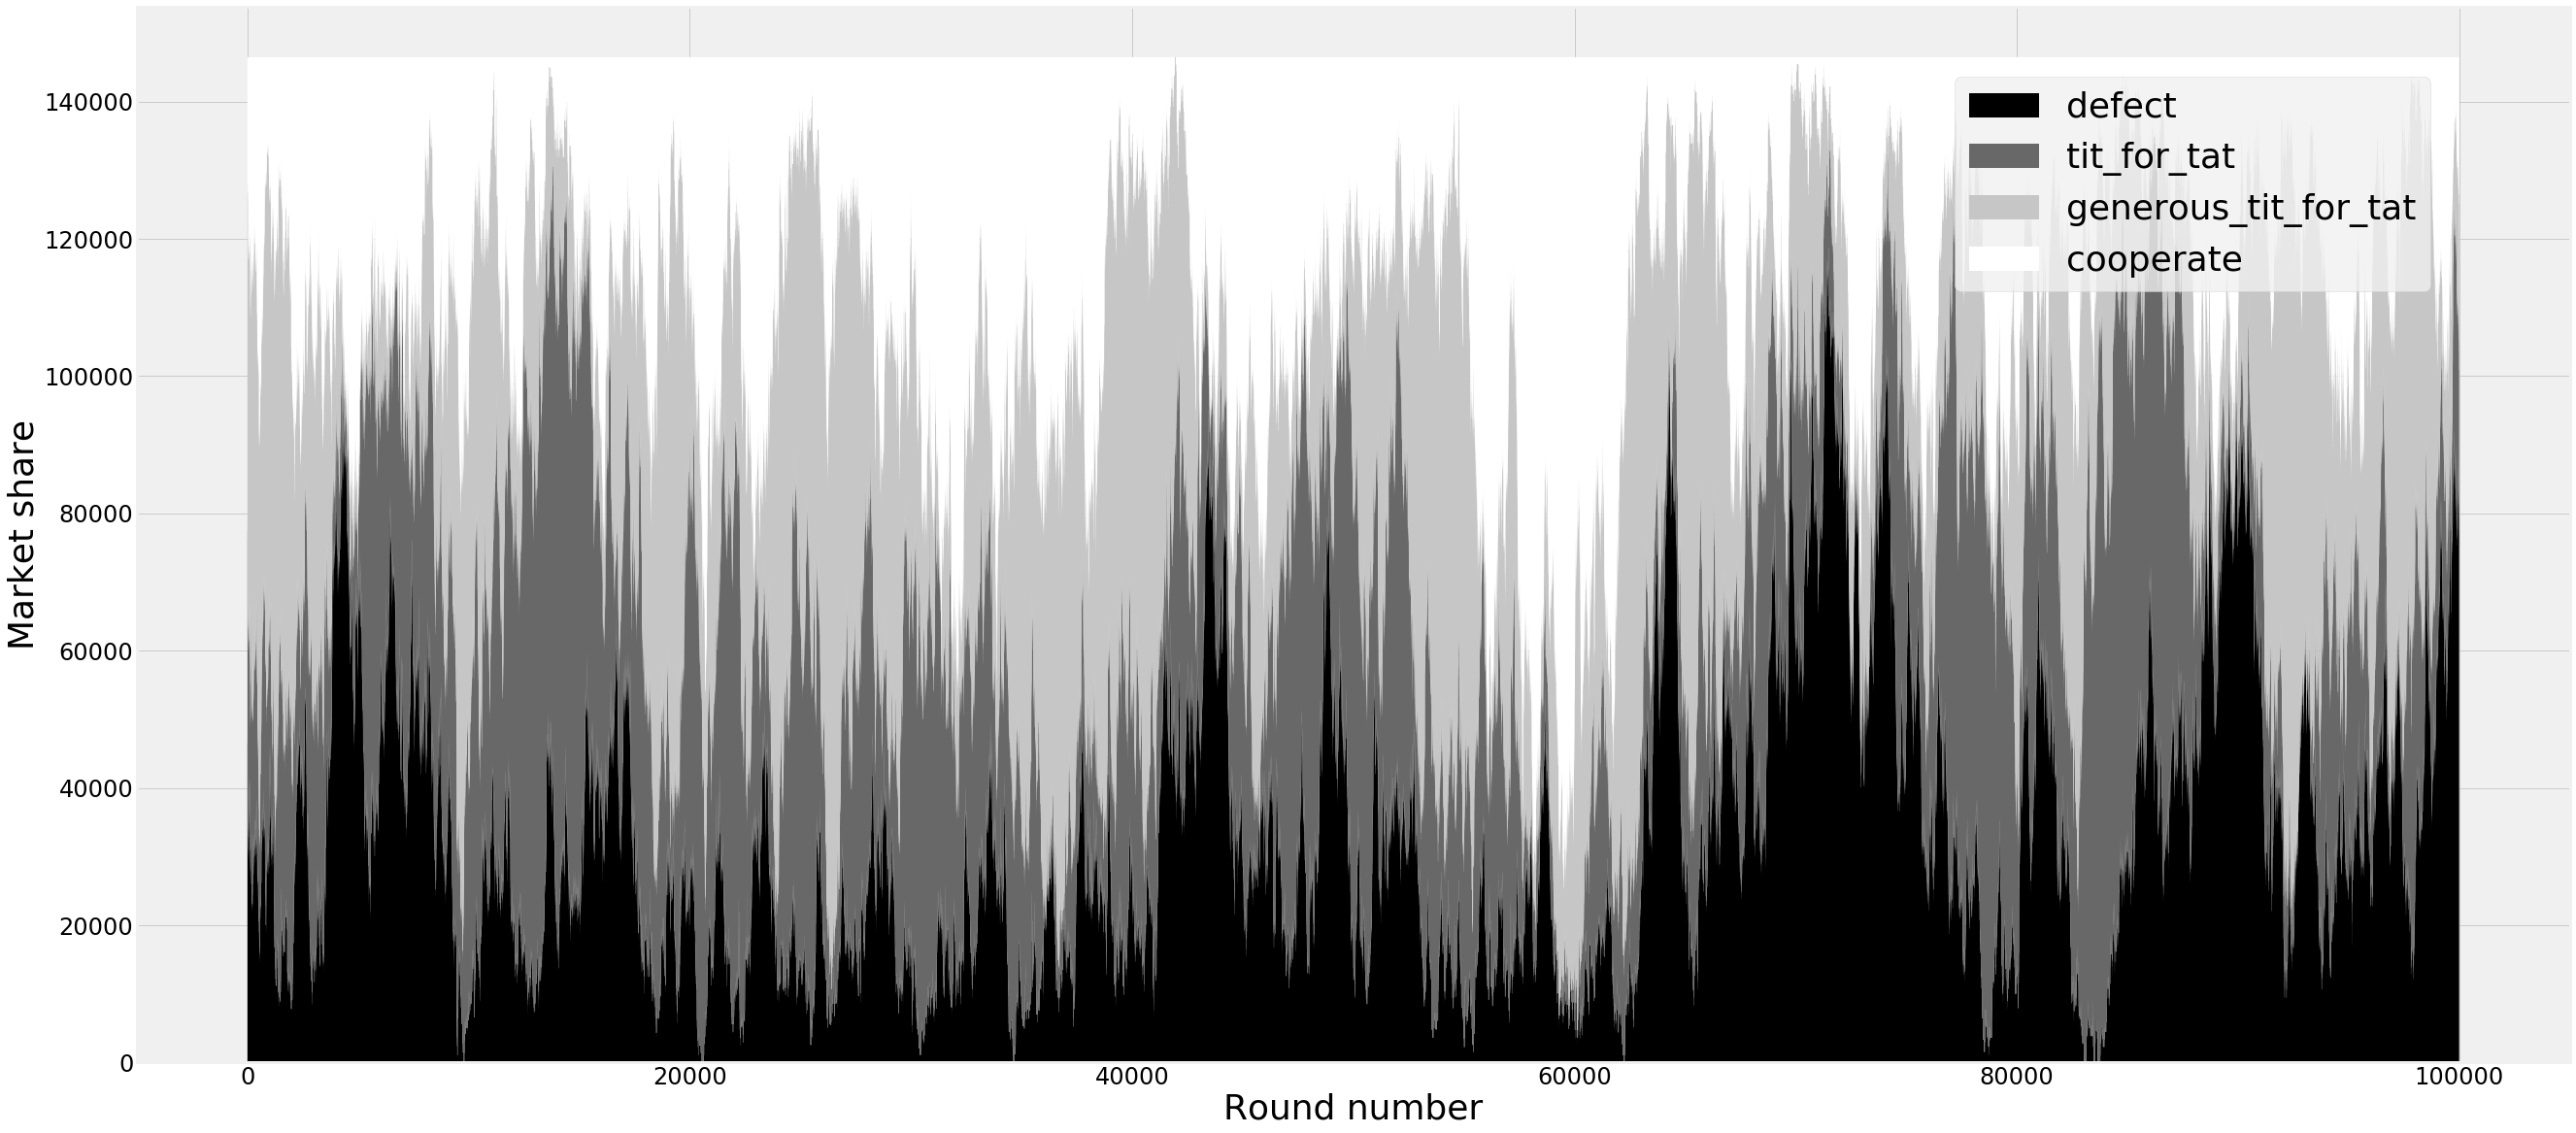

In [5]:
draw_stack(tournament_seed16_XmM1000_Xme01_Xmi01_AM3_Ae3_Ai3)

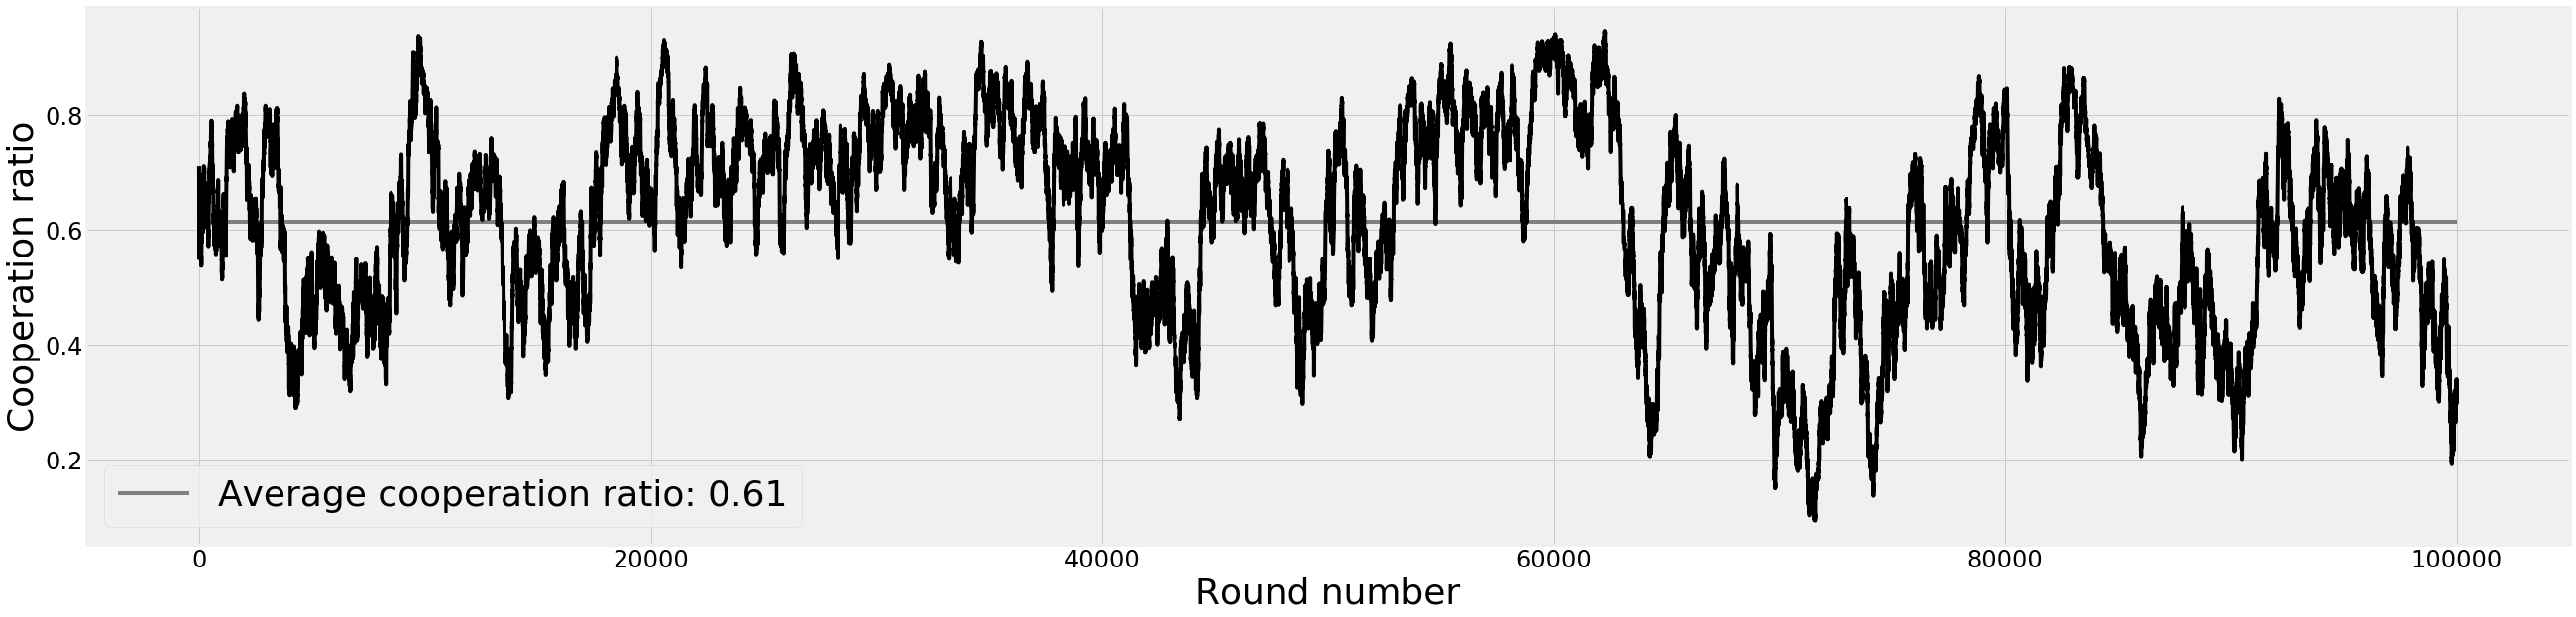

In [6]:
C_D_ratios_per_round(tournament_seed16_XmM1000_Xme01_Xmi01_AM3_Ae3_Ai3)

/Users/Annimal/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/Annimal/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


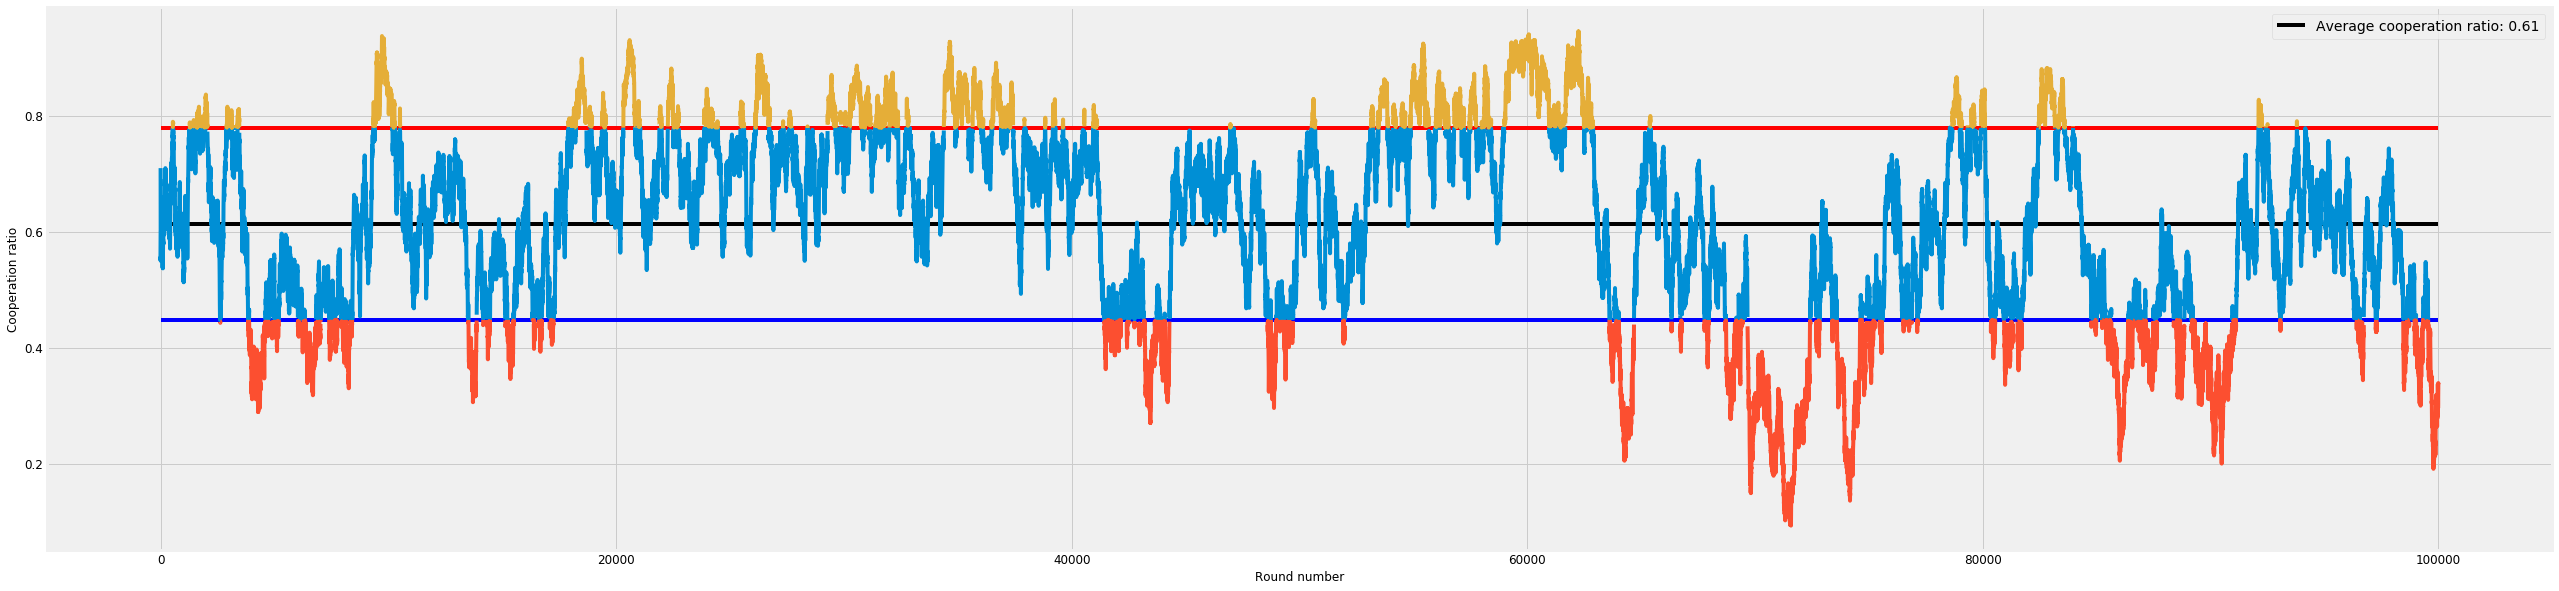

In [7]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed16_XmM1000_Xme01_Xmi01_AM3_Ae3_Ai3, constant = 1)

In [8]:
outliers = count_outliers(tournament_seed16_XmM1000_Xme01_Xmi01_AM3_Ae3_Ai3, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_seed16_XmM1000_Xme01_Xmi01_AM3_Ae3_Ai3_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5     807
1    0.6     790
2    0.7     872
3    0.8     839
4    0.9     796
5    1.0     737
6    1.1     640
7    1.2     546
8    1.3     458
9    1.4     417
10   1.5     339
11   1.6     259
12   1.7     219
13   1.8     197
14   1.9     108
15   2.0     115
16   2.1      64
17   2.2      50
18   2.3      44
19   2.4      51
20   2.5      31
21   2.6      13
22   2.7      16
23   2.8      11
24   2.9      18
25   3.0      13


In [9]:
save_cooperate_csv(tournament_seed16_XmM1000_Xme01_Xmi01_AM3_Ae3_Ai3, type_of_tournament= "seed16_XmM1000_Xme01_Xmi01_AM3_Ae3_Ai3", seed = str(seed))